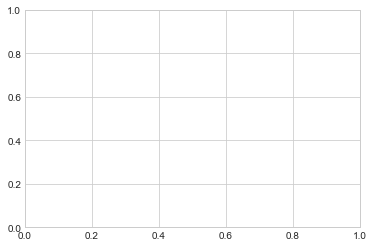

In [6]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

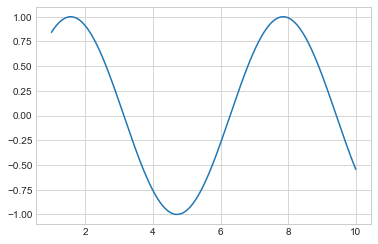

In [11]:
x = np.linspace(1,10,1000)
ax = plt.axes()
ax.plot(x, np.sin(x)) # NOTE: vscode issue: you need to declare the ax object in the same cell for the plot to show up.

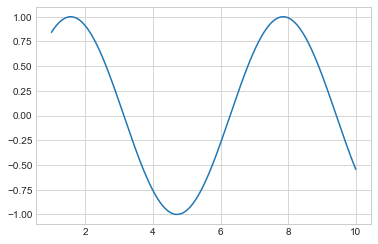

In [9]:
plt.plot(x, np.sin(x))